In [54]:
import pyes
import pandas as pd
import elasticsearch
import os
import numpy as np
import time

es_address='192.168.1.112:9200'
conn = pyes.es.ES(es_address) #create
bq = pyes.query.BoolQuery() #結合很多時間範圍的query
#q = pyes.query.MatchAllQuery()

tq = pyes.query.TermQuery(field="text", value="cve") #找出想要的term出來
tq1 = pyes.query.TermQuery(field="text", value="vulnerability")
tq2 = pyes.query.TermQuery(field="text", value="exploit")

ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 01 00:00:00 +0000 2014", to_value="Wed Dec 31 23:59:59 +0000 2014", 
                   include_lower=True ,include_upper=True) #抓range
rq = pyes.query.RangeQuery(qrange=ESR)

bq.add_should(tq) #must = AND, 將tq rq抓進來, 將成立的條件加進來
bq.add_should(tq1)
bq.add_should(tq2)
bq.add_must(rq)

result = conn.search(query=bq , indices='twitter2' , doc_types='tweet') 


Twitters = []
Tweets = []
Url = []
Dates = []

#取有需要的資料
for i in result:
    Twitters.append(i['user']['name'])
    Tweets.append(i['text'])
    Url.append(i['entities']['urls'])
    Dates.append(int(time.strftime('%m', time.strptime(i['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))))

Twitter = np.unique(Twitters)

print 'Twitters :',len(Twitter) #Twitters
print 'Tweets :',len(result) #Tweets

Twitters : 83
Tweets : 1421


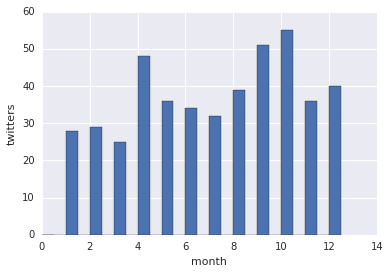

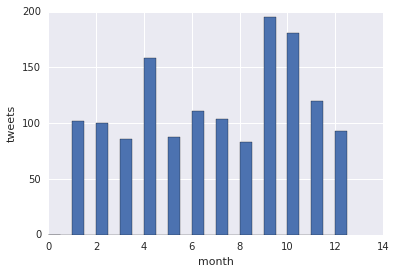

In [55]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

Month_tweet = pd.DataFrame({'Tweet':pd.Series(Tweets), 'Month':pd.Series(Dates)}) #tweets and months

Month_twitter = pd.DataFrame({'Twitter':pd.Series(Twitters), 'Month':pd.Series(Dates)}) #twitters and months
Month_twitter = Month_twitter.drop_duplicates() #同月重複的twitter刪掉

ax = np.arange(0,13,0.5)
#twitters(12 month)
Month_twitter['Month'].hist(bins = ax)
plt.xlabel('month')
plt.ylabel('twitters')
plt.show()

#tweets(12 month)
Month_tweet['Month'].hist(bins = ax)
plt.xlabel('month')
plt.ylabel('tweets')
plt.show()

url : 1198  no_url : 223


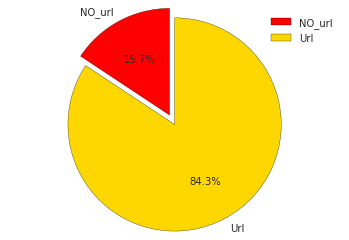

In [57]:
url = 0

#找有多少個有url
for url1 in Url:
    for url2 in url1:
        url += 1
        
no_url = len(Url) - url

print 'url :',url,' no_url :',no_url

#set parameters
sizes = [no_url, url]
colors = ['red','gold']
labels = 'NO_url','Url'
explode = (0.1,0)

plt.pie(sizes, colors = colors, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = False, startangle = 90)
plt.axis('equal')
plt.legend()

plt.show()

/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D object at 0x7f508e9b4890>, <matplotlib.lines.Line2D object at 0x7f508e363050>, <matplotlib.lines.Line2D object at 0x7f508e0edd50>, <matplotlib.lines.Line2D object at 0x7f508e3e5e10>, <matplotlib.lines.Line2D object at 0x7f508e46da50>, <matplotlib.lines.Line2D object at 0x7f50c00a5350>, <matplotlib.lines.Line2D object at 0x7f5090f2f4d0>, <matplotlib.lines.Line2D object at 0x7f508e313590>, <matplotlib.lines.Line2D object at 0x7f508e47ead0>, <matplotlib.lines.Line2D object at 0x7f508e868090>, <matplotlib.lines.Line2D object at 0x7f508e8d8e90>, <matplotlib.lines.Line2D object at 0x7f508e7a7450>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f508e363890>, <matplotlib.lines.Line2D object at 0x7f508e3f0d10>, <matplotlib.lines.Line2D object at 0x7f508e6a4290>, <matplotlib.lines.Line2D object at 0x7f508e46d890>, <matplotlib.lines.Line2D object at 0x7f5090fe3c10>, <matplotlib.lines.Line2D object at 0x7f5090f2f310>, <matplotlib.lines.Line2D object at 0x7f50

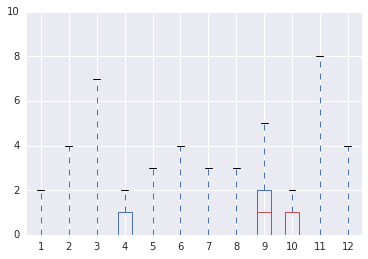

In [66]:
bq1 = pyes.query.BoolQuery()
bq1.add_should(tq)
bq1.add_must(rq)

result1 = conn.search(query=bq1 , indices='twitter2' , doc_types='tweet')

Twitters_cve = []
Dates_cve = []

for i in result1:
    Twitters_cve.append(i['user']['name'])
    Dates_cve.append(int(time.strftime('%m', time.strptime(i['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))))

CVE = pd.DataFrame({'Twitter_cve':pd.Series(Twitters_cve), 'Month_cve':pd.Series(Dates_cve)})
CVE = pd.crosstab(CVE['Twitter_cve'],CVE['Month_cve'])

print CVE.boxplot()

In [64]:
bq2 = pyes.query.BoolQuery()

tq = pyes.query.TermQuery(field="text", value="cve")
tq1 = pyes.query.TermQuery(field="text", value="vulnerability")
tq2 = pyes.query.TermQuery(field="text", value="exploit")
tq3 = pyes.query.TermQuery(field="text", value="vulnerable")

ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 01 00:00:00 +0000 2014", to_value="Wed Dec 31 23:59:59 +0000 2014", 
                   include_lower=True ,include_upper=True) 

rq = pyes.query.RangeQuery(qrange=ESR)

bq2.add_should(tq)
bq2.add_should(tq1)
bq2.add_should(tq2)
bq2.add_should(tq3)
bq2.add_must(rq)

result2 = conn.search(query=bq , indices='twitter2' , doc_types='tweet') 

Twitters2 = []
Tweets2 = []

#取有需要的資料
for i in result2:
    Twitters2.append(i['user']['name'])
    Tweets2.append(i['text'])

ZScaler's Samir Patil explains how the Fiesta exploit kit exploits Java vulnerability CVE-2013-2465 http://t.co/14hsDJTzHh
